In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import metrics, model_selection
import glob
import os
from PIL import Image
import tqdm.notebook as tqdm
import matplotlib.pyplot as plt
import math
import collections
import sys
sys.path.append('../')
from generator import get_dataset

tf.config.set_visible_devices([], 'GPU')

In [3]:
path = '../../input/siim-isic-melanoma-classification/'

input_path = '../../input/'
train_data = pd.read_csv(path + 'train.csv')
test_data = pd.read_csv(path + 'test.csv')
    
submission_data = pd.read_csv(path + 'sample_submission.csv')
test_data['target'] = 0
print("test shape =", test_data.shape)
print(test_data.head(3))
print("\ntrain shape =", train_data.shape)
print(train_data.head(3))

test shape = (10982, 6)
     image_name  patient_id     sex  age_approx anatom_site_general_challenge  \
0  ISIC_0052060  IP_3579794    male        70.0                           NaN   
1  ISIC_0052349  IP_7782715    male        40.0               lower extremity   
2  ISIC_0058510  IP_7960270  female        55.0                         torso   

   target  
0       0  
1       0  
2       0  

train shape = (33126, 12)
     image_name  patient_id     sex  age_approx anatom_site_general_challenge  \
0  ISIC_2637011  IP_7279968    male        45.0                     head/neck   
1  ISIC_0015719  IP_3075186  female        45.0               upper extremity   
2  ISIC_0052212  IP_2842074  female        50.0               lower extremity   

  diagnosis benign_malignant  target  tfrecord  width  height  patient_code  
0   unknown           benign       0         0   6000    4000             0  
1   unknown           benign       0         0   6000    4000             1  
2     nevus      

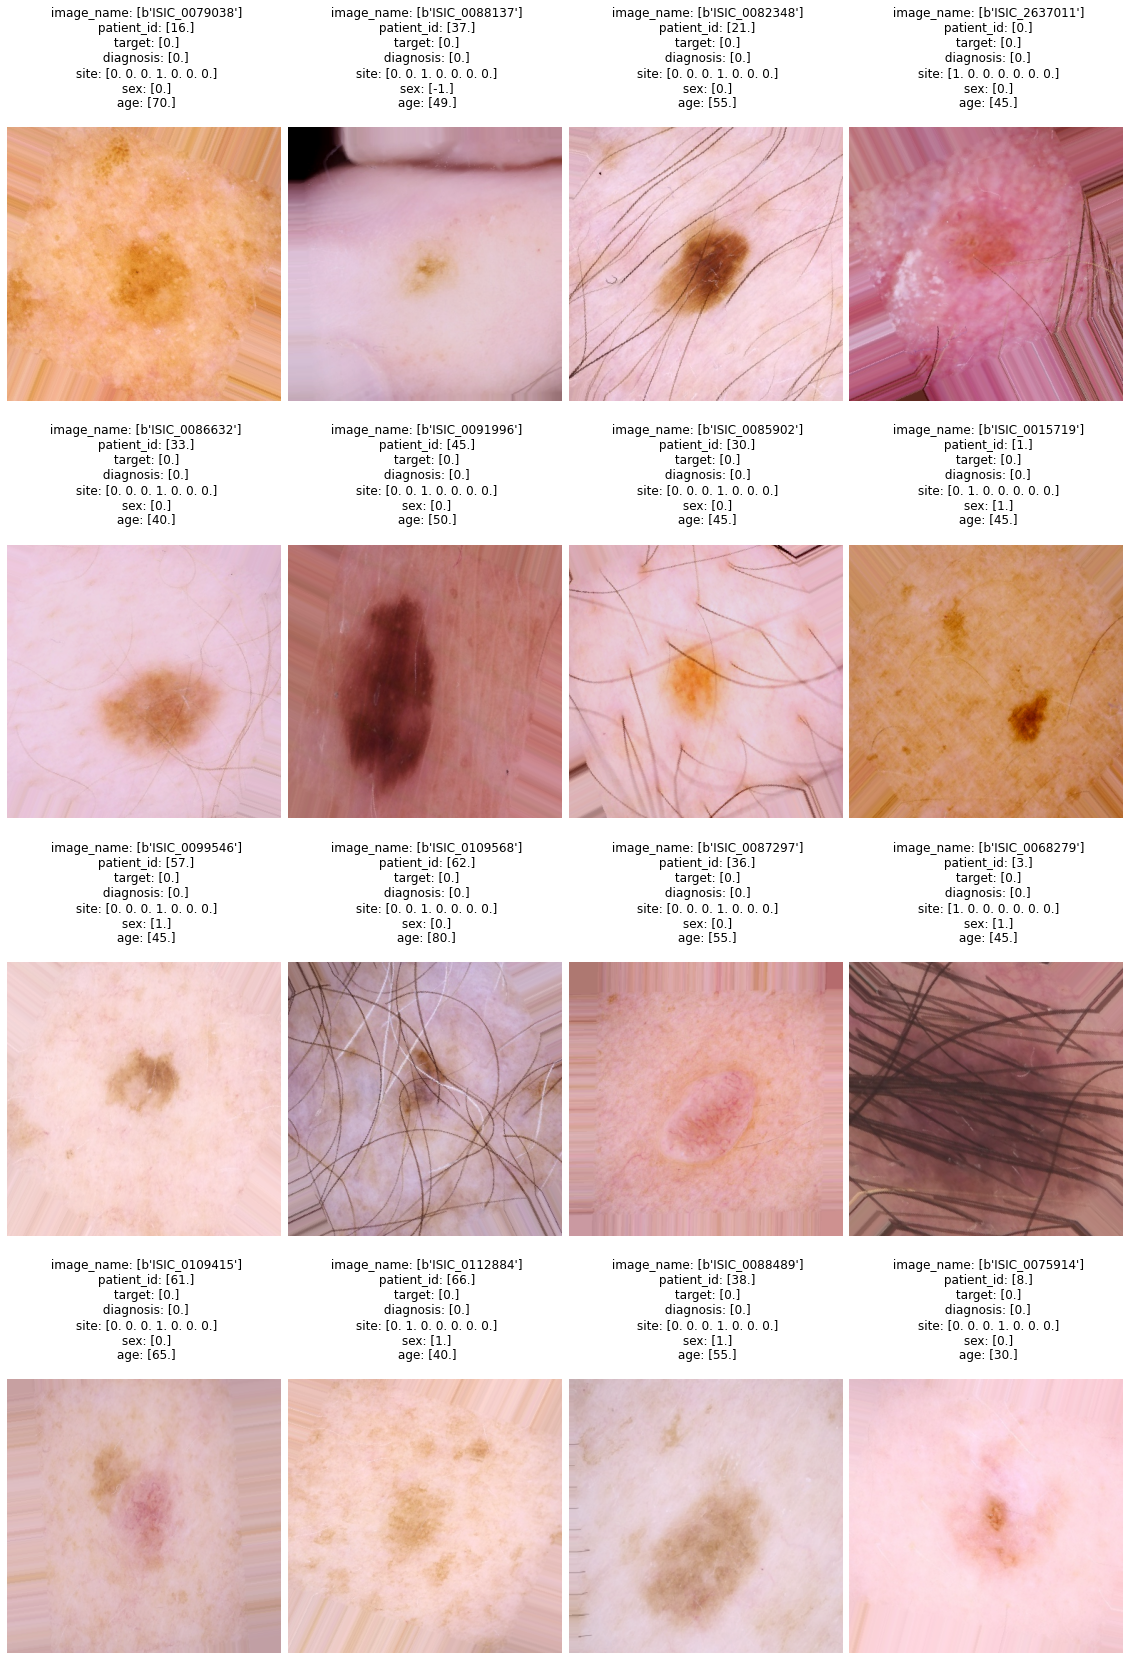

In [5]:
import glob
import matplotlib.pyplot as plt

ds = get_dataset(
    tfrec_paths=glob.glob('../../input/melanoma-384x384/train*'),
    batch_size=16,
    augment='heavy',
    shuffle=False,
    cache=None
)

for inp in ds.take(1): pass

fig, axes = plt.subplots(4, 4, figsize=(20, 30))

for i, ax in enumerate(axes.reshape(-1)):
    ax.imshow(inp['image'].numpy()[i]);
    ax.set_title(
        ' image_name: ' + str(inp['image_name'].numpy()[i]) + '\n' +
        ' patient_id: ' + str(inp['patient_id'].numpy()[i]) + '\n' +
        ' target: '     + str(inp['target'].numpy()[i]) + '\n' +
        ' diagnosis: '  + str(inp['target'].numpy()[i]) + '\n' +
        ' site: '       + str(inp['anatom_site_general_challenge'].numpy()[i]) + '\n' +
        ' sex: '        + str(inp['sex'].numpy()[i]) + '\n' +
        ' age: '        + str(inp['age_approx'].numpy()[i]) + '\n'
    )
    ax.axis('off')

plt.subplots_adjust(hspace=0.1, wspace=0.025)